# Mini-Project 4: Reproducibility in ML 

**Authors**: Antoine Bonnet, Dragos Secrieru and Cyril Saidane 

**Course**: COMP 551: Applied Machine Learning, McGill University

In this project, we reproduce the LeNet-5 architecture for image classification on the MNIST dataset, as published in the paper ["Gradient-Based Learning Applied to Document Recognition"](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf) by Yann LeCun, Leon Bottou, Patrick Haffner and Yoshua Bengio in 1998. 



https://towardsdatascience.com/understanding-and-implementing-lenet-5-cnn-architecture-deep-learning-a2d531ebc342

https://towardsdatascience.com/understanding-lenet-a-detailed-walkthrough-17833d4bd155





---------TO-DO LIST FOR PAPER-------

Part 1 - Testing the Model (Reproducing same result)

1. Pick 2 other methods described in the paper, the simpler the better (ex: KNN, Lenet 1) and look at their test error compared to LeNet 5.
Compare the test error of all 3 models to what they had in the paper, see if it's replicable.

2. Claim in the paper: most CNN models, the more you train them, the lower the train error gets. For example in MP3 we managed to get like 99.8% accuracy. This does not happen with LeNet5. Reproduce that result, see if training error really stagnates with more training time. 

Part 2 - Experimenting with the model

1. Going back to the second point in part 2, the author's claim that the reason the training error does not go down is because of the high learning rates. They give no evidence for that. As an experiment we train the model with lower learning rates than the paper and see if the training error is still stable. 

2. Play around with the activations functions. For example they used tanh with two fixed parameters. They claim that changing those parameters would not change the test error. We test that claim by playing around with it. 

## 1: Acquire, preprocess, and analyze the data

In this section, we load and pre-process the MNIST dataset for later use. 

### 1.0 Resource imports

We first import several Python libraries. 

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.graph_objects as go

You may need to run the following command in your terminal to gain access to the MNIST dataset from TensorFlow:

`pip install tensorflow_datasets`



### 1.1 Loading and exploring the data

We first load the [MNIST](https://www.kaggle.com/code/ngbolin/mnist-dataset-digit-recognizer/notebook) from TensorFlow, and split it into training and testing sets. 


In [ ]:
from tensorflow.keras.datasets import mnist
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
trainClasses = np.unique(Ytrain, return_counts=True)

In [ ]:
testClasses = np.unique(Ytest, return_counts=True)

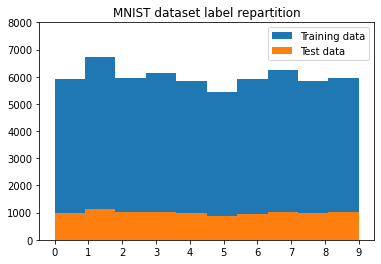

In [ ]:
plt.hist(Ytrain, bins = 10, label="Training data")
plt.hist(Ytest, bins = 10, label="Test data")
plt.xticks(range(0,10))
plt.title("MNIST dataset label repartition")
plt.ylim(0,8000)
plt.legend()
plt.show()

This dataset contains a training set of 60K instances and a test set of 10K instances, where each instance corresponds ot a 28x28 grayscale image labelled by one of 10 classes, corresponding to the digits from 0 to 9. 

In [ ]:
# Shape of dataset
print("Training features:", Xtrain.shape)
print("Training labels:", Ytrain.shape)
print("Testing features:", Xtest.shape)
print("Testing labels:", Ytest.shape)

Training features: (60000, 28, 28)
Training labels: (60000,)
Testing features: (10000, 28, 28)
Testing labels: (10000,)


Each image is a $28 \times 28$ matrix, where each matrix entry is a pixel intensity value between $0$ and $255$. For better intuition, we show a few examples of images from the training set. 

Label:  5


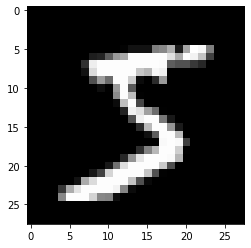

In [ ]:
print("Label: ", Ytrain[0])
plt.imshow(Xtrain[0], cmap="gray") 
plt.show() 

Label:  0


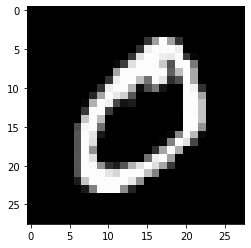

In [ ]:
print("Label: ", Ytrain[1])
plt.imshow(Xtrain[1], cmap="gray") 
plt.show() 

### 1.2 Preprocessing data

In this section, we prepare the downloaded data to be used by the multilayer perceptron. 

We first normalize the intensity values of each image so that each image matrix entry has standard normal distribution over the whole training set.

In [ ]:
# Normalize to interval [0,1] by dividing by the maximum pixel value
Xtrain = Xtrain / 255.
Xtest = Xtest / 255.

In [ ]:
Xtrain = tf.expand_dims(Xtrain, axis=3, name=None)
Xtest = tf.expand_dims(Xtest, axis=3, name=None)

We split the normalized dataset into a training set of 50 000 examples and a validation set of 10 000 examples. 

In [ ]:
X_val = Xtrain[-10000:]
Y_val = Ytrain[-10000:]

X_train = Xtrain[:-10000]
Y_train = Ytrain[:-10000]

## 2: Build and run the model

In [ ]:
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

### 2.1 LeNet-1

In [ ]:
def BuildLeNet1():
  model = Sequential()
  model.add(Conv2D(4, 5, activation="tanh", padding='valid', input_shape=Xtrain[0].shape))
  model.add(AveragePooling2D())
  model.add(Conv2D(12, 5, activation="tanh", padding='valid'))
  model.add(AveragePooling2D())
  model.add(Flatten())
  model.add(Dense(10, activation = 'softmax'))
  model.summary()
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

#es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)

In [ ]:
# Run CNN model, gather training/test accuracies for each epoch
numEpochs = 20
LeNet1 = BuildLeNet1()
history1 = LeNet1.fit(X_train, Y_train, epochs = numEpochs, validation_data=(X_val, Y_val))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 4)         104       
                                                                 
 average_pooling2d_2 (Averag  (None, 12, 12, 4)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 12)          1212      
                                                                 
 average_pooling2d_3 (Averag  (None, 4, 4, 12)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

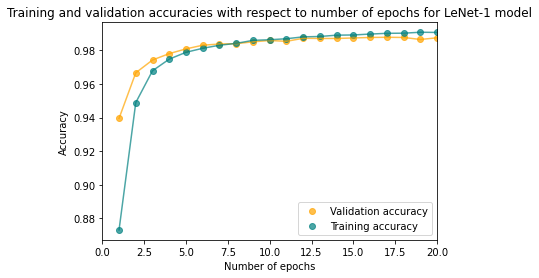

In [ ]:
epochs = list(range(1,numEpochs+1))
# Plot test/validation accuracies
plt.plot()
plt.scatter(epochs, history1.history['val_accuracy'],label='Validation accuracy',c='orange',alpha=0.7)
plt.plot(epochs, history1.history['val_accuracy'],'orange',alpha=0.7)
plt.scatter(epochs, history1.history['accuracy'],label='Training accuracy',c='teal',alpha=0.7)
plt.plot(epochs, history1.history['accuracy'],'teal',alpha=0.7)
plt.title('Training and validation accuracies with respect to number of epochs for LeNet-1 model')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.xlim(0, max(epochs))
plt.legend()
plt.show()

In [ ]:
LeNet1.evaluate(Xtest, Ytest)

313/313 [==============================] - 2s 6ms/step - loss: 0.0335 - accuracy: 0.9897


[0.03348712623119354, 0.9897000193595886]

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 4)         104       
                                                                 
 average_pooling2d_4 (Averag  (None, 12, 12, 4)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 12)          1212      
                                                                 
 average_pooling2d_5 (Averag  (None, 4, 4, 12)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 192)               0         
                                                                 
 dense_2 (Dense)             (None, 10)               

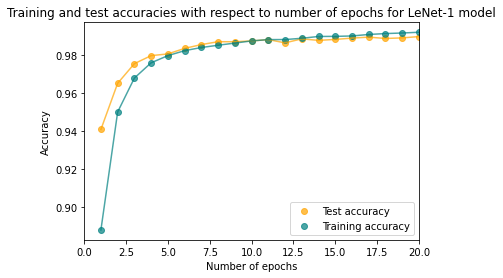

In [ ]:
# Run CNN model, gather training/test accuracies for each epoch
LeNet1b = BuildLeNet1()
history1b = LeNet1b.fit(Xtrain, Ytrain, epochs = numEpochs, validation_data=(Xtest, Ytest))

# Plot test/validation accuracies
plt.plot()
plt.scatter(epochs, history1b.history['val_accuracy'],label='Test accuracy',c='orange',alpha=0.7)
plt.plot(epochs, history1b.history['val_accuracy'],'orange',alpha=0.7)
plt.scatter(epochs, history1b.history['accuracy'],label='Training accuracy',c='teal',alpha=0.7)
plt.plot(epochs, history1b.history['accuracy'],'teal',alpha=0.7)
plt.title('Training and test accuracies with respect to number of epochs for LeNet-1 model')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.xlim(0, max(epochs))
plt.legend()
plt.show()

### 2.2 LeNet-4

In [ ]:
def BuildLeNet4():
  model = Sequential()
  model.add(Conv2D(4, 5, activation="tanh", padding='same', input_shape=Xtrain[0].shape))
  model.add(AveragePooling2D())
  model.add(Conv2D(16, 5, activation="tanh", padding='valid'))
  model.add(AveragePooling2D())
  model.add(Conv2D(120, 5, activation="tanh", padding='valid'))
  model.add(Flatten())
  model.add(Dense(10, activation = 'softmax'))
  model.summary()
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
# Run CNN model, gather training/test accuracies for each epoch
LeNet4 = BuildLeNet4()
history4 = LeNet4.fit(X_train, Y_train, epochs = numEpochs, validation_data=(X_val, Y_val))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 4)         104       
                                                                 
 average_pooling2d_6 (Averag  (None, 14, 14, 4)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        1616      
                                                                 
 average_pooling2d_7 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_3 (Flatten)         (None, 120)              

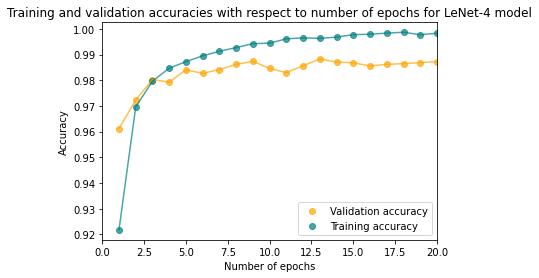

In [ ]:
# Plot test/validation accuracies
plt.plot()
plt.scatter(epochs, history4.history['val_accuracy'],label='Validation accuracy',c='orange',alpha=0.7)
plt.plot(epochs, history4.history['val_accuracy'],'orange',alpha=0.7)
plt.scatter(epochs, history4.history['accuracy'],label='Training accuracy',c='teal',alpha=0.7)
plt.plot(epochs, history4.history['accuracy'],'teal',alpha=0.7)
plt.title('Training and validation accuracies with respect to number of epochs for LeNet-4 model')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.xlim(0, max(epochs))
plt.legend()
plt.show()

In [ ]:
LeNet4.evaluate(Xtest, Ytest)

313/313 [==============================] - 3s 10ms/step - loss: 0.0445 - accuracy: 0.9872


[0.04451742023229599, 0.9872000217437744]

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 4)         104       
                                                                 
 average_pooling2d_8 (Averag  (None, 14, 14, 4)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 16)        1616      
                                                                 
 average_pooling2d_9 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_11 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_4 (Flatten)         (None, 120)              

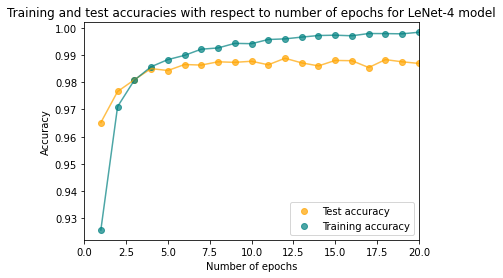

In [ ]:
# Run CNN model, gather training/test accuracies for each epoch
LeNet4b = BuildLeNet4()
history4b = LeNet4b.fit(Xtrain, Ytrain, epochs = numEpochs, validation_data=(Xtest, Ytest))
# Plot test/validation accuracies
plt.plot()
plt.scatter(epochs, history4b.history['val_accuracy'],label='Test accuracy',c='orange',alpha=0.7)
plt.plot(epochs, history4b.history['val_accuracy'],'orange',alpha=0.7)
plt.scatter(epochs, history4b.history['accuracy'],label='Training accuracy',c='teal',alpha=0.7)
plt.plot(epochs, history4b.history['accuracy'],'teal',alpha=0.7)
plt.title('Training and test accuracies with respect to number of epochs for LeNet-4 model')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.xlim(0, max(epochs))
plt.legend()
plt.show()

### 2.3 LeNet-5

In [ ]:
def BuildLeNet5():
  model = Sequential()
  model.add(Conv2D(6, 5, activation="tanh", padding='same', input_shape=Xtrain[0].shape))
  model.add(AveragePooling2D())
  model.add(Conv2D(16, 5, activation="tanh", padding='valid'))
  model.add(AveragePooling2D())
  model.add(Conv2D(120, 5, activation="tanh", padding='valid'))
  model.add(Flatten())
  model.add(Dense(84, activation = 'tanh'))
  model.add(Dense(10, activation = 'softmax'))
  model.summary()
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model
  

In [ ]:
# Run CNN model, gather training/test accuracies for each epoch
LeNet5 = BuildLeNet5()
history5 = LeNet5.fit(X_train, Y_train, epochs = numEpochs, validation_data=(X_val, Y_val))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_10 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_11 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_5 (Flatten)         (None, 120)              

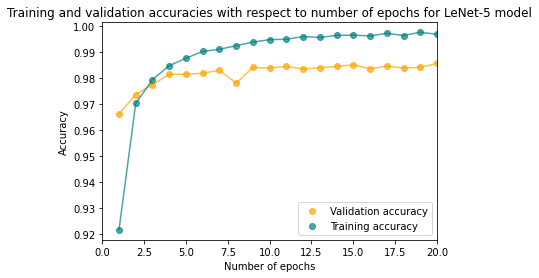

In [ ]:
# Plot test/validation accuracies
plt.plot()
plt.scatter(epochs, history5.history['val_accuracy'],label='Validation accuracy',c='orange',alpha=0.7)
plt.plot(epochs, history5.history['val_accuracy'],'orange',alpha=0.7)
plt.scatter(epochs, history5.history['accuracy'],label='Training accuracy',c='teal',alpha=0.7)
plt.plot(epochs, history5.history['accuracy'],'teal',alpha=0.7)
plt.title('Training and validation accuracies with respect to number of epochs for LeNet-5 model')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.xlim(0, max(epochs))
plt.legend()
plt.show()

In [ ]:
LeNet5.evaluate(Xtest, Ytest)

313/313 [==============================] - 3s 10ms/step - loss: 0.0550 - accuracy: 0.9871


[0.05501674860715866, 0.9871000051498413]

In [ ]:
# Run CNN model, gather training/test accuracies for each epoch
numEpochs = 20
LeNet5b = BuildLeNet5()
history5b = LeNet5b.fit(Xtrain, Ytrain, epochs = numEpochs, validation_data=(Xtest, Ytest))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_2 (Flatten)         (None, 120)              

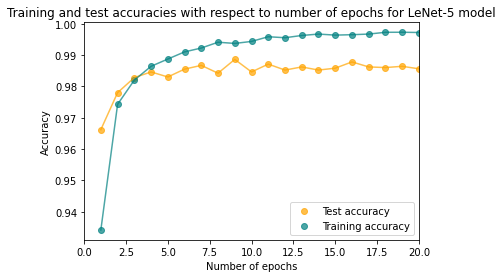

In [ ]:
# Plot test/validation accuracies
epochs = range(1, numEpochs+1)
plt.plot()
plt.scatter(epochs, history5b.history['val_accuracy'],label='Test accuracy',c='orange',alpha=0.7)
plt.plot(epochs, history5b.history['val_accuracy'],'orange',alpha=0.7)
plt.scatter(epochs, history5b.history['accuracy'],label='Training accuracy',c='teal',alpha=0.7)
plt.plot(epochs, history5b.history['accuracy'],'teal',alpha=0.7)
plt.title('Training and test accuracies with respect to number of epochs for LeNet-5 model')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.xlim(0, max(epochs))
plt.legend()
plt.show()